<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/Ass05_Startups(MLL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import all Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

**Read the data**

In [2]:
data = pd.read_csv('/content/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#**EDA** for data cleaning and understanding data

In [3]:
# Rename columns - remove space between column names
data = data.rename(columns={
    "R&D Spend":"RandD_Spend",
    "Marketing Spend":"Marketing_Spend"
})

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RandD_Spend      50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
# Check for missing values
data.isnull().sum()

RandD_Spend        0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [6]:
data.describe()

,RandD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
# Finding Data duplication
data[data.duplicated()]
# No duplicated data

,RandD_Spend,Administration,Marketing_Spend,State,Profit


# **Correlation Matrix**

In [8]:
data.corr()

<ipython-input-8-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,RandD_Spend,Administration,Marketing_Spend,Profit
RandD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot betwen var allong with histrogram

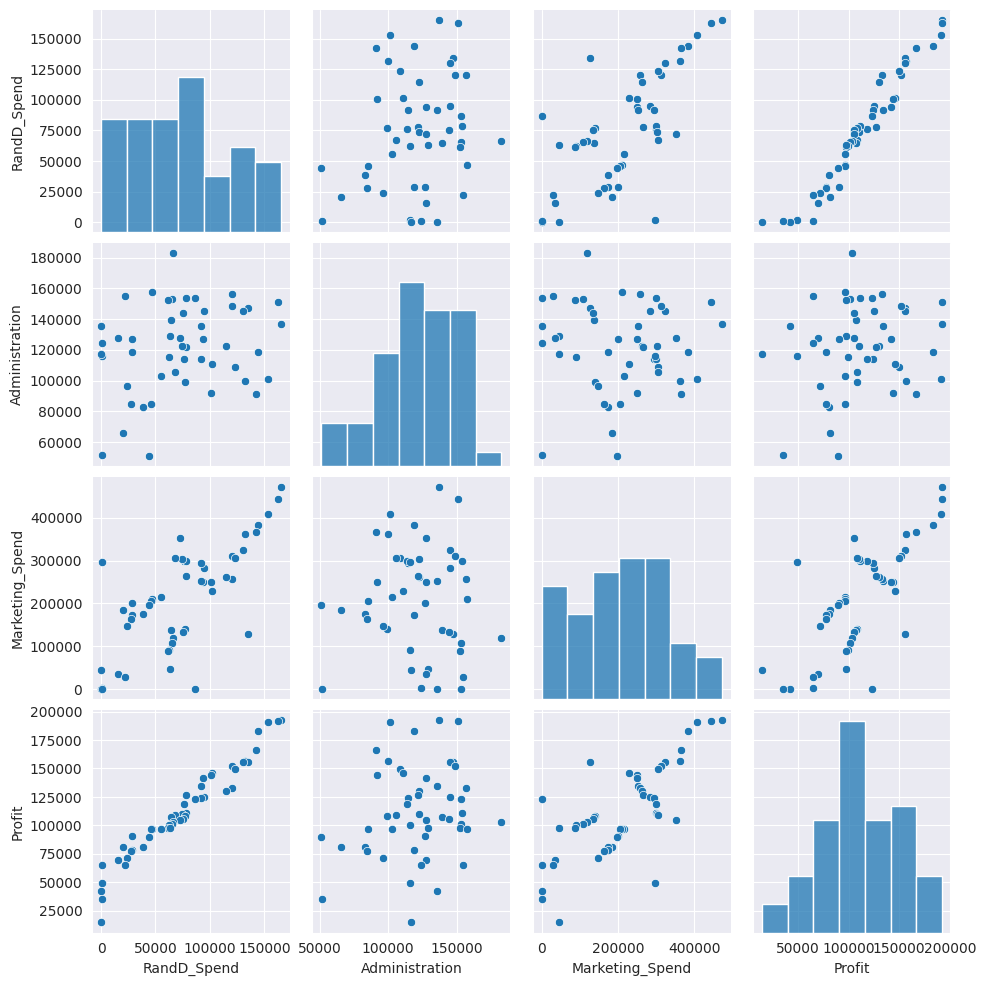

In [9]:
sns.set_style(style="darkgrid")
sns.pairplot(data)

# **Preparing a model**
# Build Model

In [10]:
model =  smf.ols('Profit~RandD_Spend+Administration+Marketing_Spend',data= data).fit()

# **Model Testing**

In [11]:
# Coefficient of Beta values
model.params

Intercept          50122.192990
RandD_Spend            0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [12]:
# Finding tvalues and pvalues
print("*** T-Values ***\n",model.tvalues,'\n\n\n','*** P-Values ***\n',model.pvalues)
# Here , alpha is greater than all columns pvalues

*** T-Values ***
 Intercept           7.626218
RandD_Spend        17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 


 *** P-Values ***
 Intercept          1.057379e-09
RandD_Spend        2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [13]:
# Finding R^2 values
(model.rsquared,model.rsquared_adj)
# This model is showing GOOD model

(0.9507459940683246, 0.9475337762901719)